# 모든 네트워크 파일 ncol 확장자로 바꾸기

In [1]:
# import modules

import pandas as pd
import os

In [2]:
# 우선 network 파일 이름 ncol로 바꿔야함
# 그래서 모든 파일들 이름 불러온 딕셔너리 만들기

file_name = {}
basic_path = "/home/Data_Drive_8TB_2/Controllability/data/critical_edges"

for i in range(1, 5):
    file_name[f'stage{i}'] = os.listdir(basic_path + f"/stage{i}/")

file_name

{'stage1': ['HOD', 'PGC_40_OD', 'EVL_38_HOD'],
 'stage2': ['30_2', '30_1', 'EVL_38_30', 'PGC_40_30', '30_3'],
 'stage3': ['75_2', 'PGC_40_75', '75_1', '75_4', 'EVL_38_75', '75_5', '75_3'],
 'stage4': ['3_Tailbud',
  '26_Endoderm_Pancreatic+Intestinal',
  '12_Somites',
  '57_Placode_Epibranchial+Otic',
  '52_Hematopoietic_ICM',
  '19_Diencephalon',
  '56_Hindbrain_R4+5+6',
  '10_Neural_Plate_Border',
  '34_Adaxial_Cells',
  '53_Placode_Olfactory',
  '5_Heart_Primordium',
  '8_Spinal_Cord',
  '29_Prechordal_Plate',
  '58_Hematopoietic_RBI+Pronephros',
  '2_Optic_Cup',
  'PGC_40_SOMITE',
  '17_Endoderm_Pharyngeal',
  '50_Hindbrain_R3',
  '55_Placode_Adeno+Lens+Trigeminal',
  '32_Notochord',
  '16_Telencephalon',
  '59_midbrain+neural_crest',
  '18_Cephalic_Mesoderm',
  'EVL_38_SOMITE',
  '1_Epidermis']}

In [3]:
# os 명령어 awk를 이용해 모든 네트워크 ncol 파일들 1, 3번 column만 가져오고
# 그 가져온 것들은 .ncol 확장자로 저장하며
# 원본 파일은 지운다

for i in range(1, 5):
    for n in file_name[f'stage{i}']:
        naming = basic_path + '/' + f'stage{i}' + '/' + n 
        awk_ = 'awk' + ' ' + "'{print $1, $3}'" + ' ' + naming + ' ' + '>' + ' ' + naming + '.ncol'
        os.system(awk_)
        rm_ = 'rm' + ' ' + naming
        os.system(rm_)

# netctrl 돌리기

In [1]:
# import modules

import pandas as pd
import os
import shutil
import tempfile
import subprocess
import json

netctrl = '/home/Program/netctrl/build/src/ui/netctrl'

In [2]:
# 모든 ncol 파일 가져오기

file_name = {}
basic_path = "/home/Data_Drive_8TB_2/Controllability/data/critical_edges"

for i in range(1, 5):
    file_name[f'stage{i}'] = os.listdir(basic_path + f"/stage{i}/")

file_name

{'stage1': ['HOD.ncol', 'EVL_38_HOD.ncol', 'PGC_40_OD.ncol'],
 'stage2': ['30_2.ncol',
  'PGC_40_30.ncol',
  '30_1.ncol',
  '30_3.ncol',
  'EVL_38_30.ncol'],
 'stage3': ['75_5.ncol',
  'EVL_38_75.ncol',
  'PGC_40_75.ncol',
  '75_2.ncol',
  '75_1.ncol',
  '75_4.ncol',
  '75_3.ncol'],
 'stage4': ['55_Placode_Adeno+Lens+Trigeminal.ncol',
  '3_Tailbud.ncol',
  '2_Optic_Cup.ncol',
  '59_midbrain+neural_crest.ncol',
  '12_Somites.ncol',
  '57_Placode_Epibranchial+Otic.ncol',
  '26_Endoderm_Pancreatic+Intestinal.ncol',
  '8_Spinal_Cord.ncol',
  '5_Heart_Primordium.ncol',
  '50_Hindbrain_R3.ncol',
  '52_Hematopoietic_ICM.ncol',
  '29_Prechordal_Plate.ncol',
  '10_Neural_Plate_Border.ncol',
  '17_Endoderm_Pharyngeal.ncol',
  '18_Cephalic_Mesoderm.ncol',
  '32_Notochord.ncol',
  'PGC_40_SOMITE.ncol',
  '16_Telencephalon.ncol',
  '1_Epidermis.ncol',
  '34_Adaxial_Cells.ncol',
  'EVL_38_SOMITE.ncol',
  '19_Diencephalon.ncol',
  '56_Hindbrain_R4+5+6.ncol',
  '53_Placode_Olfactory.ncol',
  '58_Hemat

In [ ]:
# 결과를 저장할 딕셔너리
netctrl_results = {}

# edge 끊어가며 하는 for문
for i in range(1, 5):
    # 최종 딕셔너리에 stage 키 추가
    stage_key = f'stage{i}'
    netctrl_results[stage_key] = {}
    
    for n in file_name[f'stage{i}']:
        # stage 안에 network 키 추가
        network_key = n
        netctrl_results[stage_key][network_key] = {}
        
        # 원본 파일 경로
        input_file = os.path.join(basic_path, stage_key, n)

        # 원본 파일의 줄 수 확인
        wc_output = subprocess.check_output(['wc', '-l', input_file], text=True)
        num_lines = int(wc_output.split()[0])  # 첫 번째 값이 줄 수

        # 임시 디렉토리 생성
        temp_dir = tempfile.mkdtemp(prefix="network_edges_")

        # 원본 파일 읽기
        with open(input_file, 'r') as f:
            lines = f.readlines()
            
        # 각 줄을 제거한 새로운 네트워크 파일 생성
        for l in range(len(lines)):
            output_file = os.path.join(temp_dir, f"{l+1}.ncol")
            with open(output_file, 'w') as f:
                for j, line in enumerate(lines):
                    if j != l:
                        f.write(line)
            # netctrl 실행 후 결과 가져오기
            command = f"{netctrl} -m liu {output_file} | wc -l" # liu
            #command = f"{netctrl} {output_file} | wc -l" # switchboard
            netctrl_output = subprocess.check_output(command, shell=True, text=True).strip()

            # 결과를 딕셔너리에 저장
            netctrl_results[stage_key][network_key][l+1] = int(netctrl_output)  # edge 번호: netctrl 결과

        # 임시 디렉토리 지우기
        shutil.rmtree(temp_dir)

# 결과를 JSON 파일로 저장
output_json_path = "/home/Data_Drive_8TB_2/Controllability/data/critical_edges/netctrl_results_liu.json" # liu
#output_json_path = "/home/Data_Drive_8TB_2/Controllability/data/critical_edges/netctrl_results_SB.json" # switchboard
with open(output_json_path, 'w', encoding='utf-8') as json_file:
    json.dump(netctrl_results, json_file, ensure_ascii=False, indent=4)

>> loading graph: /tmp/network_edges_sksfl65f/1.ncol
>> graph is directed and has 511 vertices and 1269 edges
>> calculating control paths and driver nodes
>> found 451 driver node(s)
>> loading graph: /tmp/network_edges_sksfl65f/2.ncol
>> graph is directed and has 511 vertices and 1269 edges
>> calculating control paths and driver nodes
>> found 451 driver node(s)
>> loading graph: /tmp/network_edges_sksfl65f/3.ncol
>> graph is directed and has 511 vertices and 1269 edges
>> calculating control paths and driver nodes
>> found 451 driver node(s)
>> loading graph: /tmp/network_edges_sksfl65f/4.ncol
>> graph is directed and has 511 vertices and 1269 edges
>> calculating control paths and driver nodes
>> found 451 driver node(s)
>> loading graph: /tmp/network_edges_sksfl65f/5.ncol
>> graph is directed and has 511 vertices and 1269 edges
>> calculating control paths and driver nodes
>> found 451 driver node(s)
>> loading graph: /tmp/network_edges_sksfl65f/6.ncol
>> graph is directed and ha

# JSON 결과 파일을 가지고 edge categrozed dictionary 파일 만들기

In [1]:
# import module

import json
import os
import pandas as pd

In [2]:
# JSON 파일 읽어오기
json_file_path = "/home/Data_Drive_8TB_2/Controllability/data/critical_edges/netctrl_results_liu.json" # liu
#json_file_path = "/home/Data_Drive_8TB_2/Controllability/data/critical_edges/netctrl_results_SB.json" # switchboard
with open(json_file_path, 'r', encoding='utf-8') as json_file:
    netctrl_results = json.load(json_file)

# 모든 네트워크 ncol 파일들 불러오기 (엣지 정보를 위해)
basic_path = "/home/Data_Drive_8TB_2/Controllability/data/critical_edges"
file_name = {f'stage{i}': os.listdir(basic_path + f"/stage{i}/") for i in range(1, 5)}

# 기준 Nd 값 파일 불러오기
criteria = pd.read_csv("/home/Data_Drive_8TB_2/Controllability/data/critical_edges/criteria_Nd_liu.csv",sep = '\t') # liu
#criteria = pd.read_csv("/home/Data_Drive_8TB_2/Controllability/data/critical_edges/criteria_Nd_SB.csv",sep = '\t') # switchboard
criteria.head()

,JSON name,driver_node
0,EVL_38_HOD,434
1,PGC_40_OD,214
2,HOD,451
3,EVL_38_30,458
4,PGC_40_30,293


In [3]:
# 결과 저장할 딕셔너리
results_dict = {}

# 각 stage에 대해 반복
for stage, networks in netctrl_results.items():
    results_dict[stage] = {}

    for net_name, edge_results in networks.items():
        net_key = net_name.replace('.ncol', '')  # "HOD.ncol" -> "HOD"
        
        # 기준 값 가져오기
        criteria_value = criteria.loc[criteria['JSON name'] == net_key, 'driver_node']
        
        if criteria_value.empty:
            continue  # 해당 네트워크가 기준 데이터에 없으면 스킵
        
        criteria_value = criteria_value.item()  # 단일 값으로 변환
        
        # 새로운 딕셔너리 생성
        results_dict[stage][net_name] = {"decrease": [], "remain": [], "increase": []}
        
        # 네트워크 엣지 정보 파일 가져오기 (파일명에서 .ncol 제거하여 찾기)
        edge_file_path = os.path.join(basic_path, stage, net_name)
        if not os.path.exists(edge_file_path):
            continue  # 해당 네트워크의 엣지 파일이 없으면 스킵
        
        # 엣지 정보 로드
        with open(edge_file_path, 'r') as edge_file:
            edges = edge_file.readlines()
        
        # 각 edge의 결과 값 비교
        for idx, (edge, value) in enumerate(zip(edges, edge_results.values()), start=1):
            value = int(value)  # JSON 값이 문자열일 수도 있으니 정수 변환
            
            if value < criteria_value:
                results_dict[stage][net_name]["decrease"].append([idx, edge.strip(), value])
            elif value > criteria_value:
                results_dict[stage][net_name]["increase"].append([idx, edge.strip(), value])
            else:
                results_dict[stage][net_name]["remain"].append([idx, edge.strip(), value])

# 결과 딕셔너리 저장 (JSON 파일로 저장 가능)
output_json_path = "/home/Data_Drive_8TB_2/Controllability/data/critical_edges/netctrl_results_filtered_liu.json" # liu
#output_json_path = "/home/Data_Drive_8TB_2/Controllability/data/critical_edges/netctrl_results_filtered_SB.json" # switchboard
with open(output_json_path, 'w', encoding='utf-8') as out_file:
    json.dump(results_dict, out_file, indent=4, ensure_ascii=False)

In [4]:
results_dict

{'stage1': {'HOD.ncol': {'decrease': [[20, 'CABZ01070258.1 ATP1B1A', 450],
    [21, 'CABZ01070258.1 BAMBIA', 450],
    [25, 'CABZ01070258.1 DYNLL1', 450],
    [27, 'CABZ01070258.1 FSCN1A', 450],
    [36, 'CABZ01070258.1 SEPT12', 450],
    [38, 'CABZ01070258.1 SI:CH211-152C2.3', 450],
    [48, 'CABZ01070258.1 WNT11', 450],
    [49, 'CEBPB TDGF1', 450],
    [53, 'CTH1 BTC', 450],
    [54, 'CTH1 CA15B', 450],
    [59, 'CTH1 ELOVL7B', 450],
    [60, 'CTH1 FBXO2', 450],
    [62, 'CTH1 GOLGA3', 450],
    [66, 'CTH1 HMMR', 450],
    [70, 'CTH1 ITM2CB', 450],
    [72, 'CTH1 MDM2', 450],
    [73, 'CTH1 NRG1', 450],
    [77, 'CTH1 PGP', 450],
    [78, 'CTH1 RAI14', 450],
    [79, 'CTH1 RGS14A', 450],
    [80, 'CTH1 SH3YL1', 450],
    [82, 'CTH1 SI:DKEY-163F14.5', 450],
    [86, 'CTH1 SYTL4', 450],
    [88, 'CTH1 TMPRSS4A', 450],
    [89, 'CTH1 UBAC1', 450],
    [155, 'FOXA3 CALM3A', 450],
    [226, 'HER5 ABRACL', 450],
    [227, 'HER5 ACIN1A', 450],
    [229, 'HER5 ADIPOR2', 450],
    [230, 'HER

# critical edge 정보 확인

In [1]:
# module import

import json
import os
import pandas as pd

In [2]:
# 최종 result json 파일 load
output_json_path = "/home/Data_Drive_8TB_2/Controllability/data/critical_edges/netctrl_results_filtered_liu.json"
with open(output_json_path, 'r', encoding='utf-8') as file:
    filtered_results = json.load(file)

In [3]:
for stage in list(filtered_results.keys()):
    print("==============================")
    print("===========", stage, "===========")
    print("==============================")
    for network in list(filtered_results[stage].keys()):
        print("----------", network.replace('.ncol', ''))
        for lc in filtered_results[stage][network]['increase']:
            print(lc[1].split(' ')[0], '>>>', lc[1].split(' ')[1])
            # print(lc[1].split(' ')[0])

=========== stage1 ===========
---------- HOD
FOXB1A >>> GOLGB1
FOXD3 >>> ZGC:153675
FOXD5 >>> LRWD1
HOPX >>> ELL2
KLF6A >>> ITSN2B
POU5F3 >>> VGLL4L
SI:DKEY-43P13.5 >>> RBM38
SOX11A >>> EFHD1
SOX13 >>> HER5
ZEB1A >>> GOLGA4
---------- EVL_38_HOD
---------- PGC_40_OD
=========== stage2 ===========
---------- 30_2
E2F7 >>> GOLGB1
EVE1 >>> BLF
FOXA2 >>> SEPW1
HER5 >>> BTG2
MSGN1 >>> EFNB2A
SI:DKEY-261J4.3 >>> LRRC59
SOX32 >>> COQ10B
---------- PGC_40_30
HER5 >>> CHMP2BB
HER7 >>> SEC61G
ID2A >>> SALL4
ID3 >>> TP53
IRX7 >>> NPM2B
MYCN >>> KIAA0101
OTX1B >>> SSR4
TA >>> SI:CH211-173M16.2
XBP1 >>> P4HB
ZEB1A >>> TPM3
ZGC:113886 >>> GAPDH
---------- 30_1
BLF >>> NNR
EVE1 >>> RGCC
HER7 >>> SI:DKEY-27I16.2
ID1 >>> FOXI1
MSX1B >>> SEPH
OTX1B >>> NOVA2
TFAP2C >>> ZGC:153409
VOX >>> DDX17
ZEB1A >>> ASPM
---------- 30_3
CABZ01070258.1 >>> CAPNS1A
DRL >>> CYP2AA8
HMGB1A >>> SEPH
HOPX >>> FOPNL
MYT1A >>> TOP2A
NOTO >>> PFN1
SI:DKEY-261J4.3 >>> ZIC2A
TWIST2 >>> TUBA8L2
---------- EVL_38_30
CABZ0107025

In [4]:
TE_path = '/home/Data_Drive_8TB/khcho/Controllability_/data/TE_result'

for stage in range(1, 5):
    net_list = os.listdir(f'{TE_path}/stage{stage}/')
    print("==============================")
    print("===========", f'stage{stage}', "===========")
    print("==============================")

    for net in net_list:
        print(net)
        TE_result = pd.read_csv(f'{TE_path}/stage{stage}/{net}', sep='\t', header=None)
        TE_result = TE_result.sort_values(by=1, ascending=False)
        print(TE_result.head(3))

=========== stage1 ===========
HOD
         0         1        2
259   HER5  0.296093    CENPF
339   HER5  0.274166    PDIA3
818  SALL4  0.267402  SLC37A2
PGC_40_OD
        0         1      2
282  ID2A  1.322973  PDIA6
266  ID2A  1.289776   GLRX
290  ID2A  1.265189  RPL38
EVL_38_HOD
          0         1        2
848    ID2A  0.875995   CALM3A
2348   TP53  0.765605  SNRNP40
418   GATA3  0.760716    EFHD1
=========== stage2 ===========
30_2
          0         1      2
554   SALL4  0.199318  SRP19
452   SALL4  0.195230  CTSBA
651  SOX11A  0.192175  SALL4
30_1
                  0         1           2
572  SI:DKEY-68O6.5  0.153466  ZGC:113886
972      ZGC:113886  0.151027       EPCAM
737           TBX16  0.146988       EPCAM
EVL_38_30
                   0         1                   2
1212  SI:DKEY-68O6.5  0.756796               CMTM6
1332  SI:DKEY-68O6.5  0.742804                SSR2
1312  SI:DKEY-68O6.5  0.741338  SI:CH211-113A14.12
PGC_40_30
        0         1       2
406  TP53  1.22

In [5]:
import csv

root_path = '~/'

rows = []

for stage in filtered_results:
    for network in filtered_results[stage]:
        net_name = network.replace('.ncol', '')
        stage_net = f"{stage}_{net_name}"

        lc_genes = [
            lc[1].split(' ')[0]
            for lc in filtered_results[stage][network].get('increase', [])
            if lc and len(lc) > 1
        ]

        if not lc_genes:
            continue

        rows.append([stage_net] + lc_genes)

# DataFrame 생성 - 유전자 수가 다르기 때문에 자동 NaN 
df = pd.DataFrame(rows)

# 저장
df.to_csv(f'{root_path}/input_lc.csv', header=False)

In [6]:
for stage in list(filtered_results.keys()):
    for network in list(filtered_results[stage].keys()):
        
        net_name = network.replace('.ncol', '')

        lc_gene_list = ''
        for lc in filtered_results[stage][network]['increase']:
            lc_gene_list += ',' + lc[1].split(' ')[0]

        if len(lc_gene_list) == 0:
                continue
        
        print(f'{stage}_{net_name}'+lc_gene_list, 
             sep = '\t')

stage1_HOD,FOXB1A,FOXD3,FOXD5,HOPX,KLF6A,POU5F3,SI:DKEY-43P13.5,SOX11A,SOX13,ZEB1A
stage2_30_2,E2F7,EVE1,FOXA2,HER5,MSGN1,SI:DKEY-261J4.3,SOX32
stage2_PGC_40_30,HER5,HER7,ID2A,ID3,IRX7,MYCN,OTX1B,TA,XBP1,ZEB1A,ZGC:113886
stage2_30_1,BLF,EVE1,HER7,ID1,MSX1B,OTX1B,TFAP2C,VOX,ZEB1A
stage2_30_3,CABZ01070258.1,DRL,HMGB1A,HOPX,MYT1A,NOTO,SI:DKEY-261J4.3,TWIST2
stage2_EVL_38_30,CABZ01070258.1,CTH1,ETV4,FOXA,FOXD3,FOXD5,FOXI1,HER7,ID1,ID3,IRX7,SI:CH73-299H12.3,SI:DKEY-261J4.5,SOX11B,SOX2,TA,TBX16,TCF3B,ZIC2B,ZIC3,ZNFL2A
stage3_75_5,BACH1B,ETV4,SI:DKEY-68O6.5,UNCX4.1
stage3_EVL_38_75,FOXB1A,GBX1,ID1,ID3,MEIS2B,OTX1A,RARGA,SI:DKEY-228B2.6,SOX19A,VED,ZIC2A,ZIC3,ZNF503,ZNF750
stage3_PGC_40_75,EVE1,FOXD3,IRX1B,MEIS2B,PAX8,PRDM14,TFAP2A,ZNF503
stage3_75_2,FOXA,FOXB1A,FOXD3,NEUROG1,NOTO,PRDM1A,SALL4,VED,VOX,XBP1
stage3_75_1,DLX3B,GATA3,HER5,OLIG3,OTX2,PAX2A,TBX16,ZIC2A,ZIC3
stage3_75_4,CTH1,FOXA1,GBX1,KLF6A,OTX1A,POU5F3,RXRAA,VOX,XBP1
stage3_75_3,DMBX1A,FEZF2,GSC,MEIS3,MYF5,NR2F6B,PITX2,PRDM1A,TBX1,T

In [6]:
import numpy as np

values = list(netctrl_results['stage4']['8_Spinal_Cord.ncol'].values())

# 기본 통계 계산
mean_val = np.mean(values)
median_val = np.median(values)
min_val = np.min(values)
max_val = np.max(values)
std_dev = np.std(values)

print(f"📊 통계 정보:")
print(f"평균 (Mean): {mean_val}")
print(f"중앙값 (Median): {median_val}")
print(f"최솟값 (Min): {min_val}")
print(f"최댓값 (Max): {max_val}")
print(f"표준편차 (Std Dev): {std_dev}")


📊 통계 정보:
평균 (Mean): 256.7854077253219
중앙값 (Median): 257.0
최솟값 (Min): 256
최댓값 (Max): 258
표준편차 (Std Dev): 0.47815088333752637


(array([171.,   0.,   0.,   0.,   0., 507.,   0.,   0.,   0.,  21.]),
 array([256. , 256.2, 256.4, 256.6, 256.8, 257. , 257.2, 257.4, 257.6,
        257.8, 258. ]),
 <BarContainer object of 10 artists>)

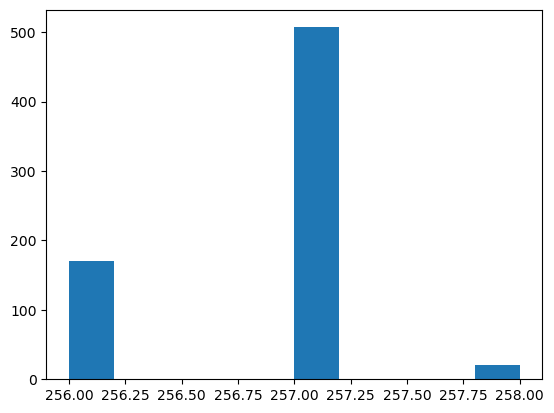

In [7]:
import matplotlib.pyplot as plt

plt.hist(values)

In [8]:
for i in values:
    if i > 95:
        print(i)
    else:
        continue

96
96
96
96
96
96
96
96
96
96
96
96
96
96


In [15]:
# 특정 값(예: 95 초과)인 index 찾기
threshold = 95
indices = [index for index, value in enumerate(values) if value > threshold]

# 결과 출력
print(f"📌 {threshold} 초과 값이 나타나는 index 목록: {indices}")

# 해당 index와 값 함께 출력
for idx in indices:
    print(f"Index {idx}: {values[idx]}")  # 1부터 시작하도록 출력

📌 95 초과 값이 나타나는 index 목록: [12, 17, 220, 233, 234, 237, 253, 373, 393, 418, 505, 511, 540, 611]
Index 12: 96
Index 17: 96
Index 220: 96
Index 233: 96
Index 234: 96
Index 237: 96
Index 253: 96
Index 373: 96
Index 393: 96
Index 418: 96
Index 505: 96
Index 511: 96
Index 540: 96
Index 611: 96


In [14]:
values[12]

96

In [19]:
netctrl_results['stage4']['8_Spinal_Cord.ncol']

{'1': 95,
 '2': 95,
 '3': 95,
 '4': 95,
 '5': 95,
 '6': 95,
 '7': 95,
 '8': 95,
 '9': 95,
 '10': 95,
 '11': 95,
 '12': 95,
 '13': 96,
 '14': 95,
 '15': 95,
 '16': 95,
 '17': 95,
 '18': 96,
 '19': 94,
 '20': 94,
 '21': 94,
 '22': 95,
 '23': 95,
 '24': 95,
 '25': 95,
 '26': 95,
 '27': 95,
 '28': 95,
 '29': 95,
 '30': 95,
 '31': 95,
 '32': 95,
 '33': 94,
 '34': 95,
 '35': 95,
 '36': 95,
 '37': 94,
 '38': 94,
 '39': 95,
 '40': 95,
 '41': 95,
 '42': 94,
 '43': 94,
 '44': 94,
 '45': 95,
 '46': 95,
 '47': 95,
 '48': 95,
 '49': 95,
 '50': 95,
 '51': 95,
 '52': 95,
 '53': 95,
 '54': 95,
 '55': 95,
 '56': 95,
 '57': 95,
 '58': 95,
 '59': 95,
 '60': 95,
 '61': 95,
 '62': 95,
 '63': 95,
 '64': 95,
 '65': 95,
 '66': 94,
 '67': 94,
 '68': 95,
 '69': 95,
 '70': 95,
 '71': 95,
 '72': 95,
 '73': 95,
 '74': 95,
 '75': 95,
 '76': 95,
 '77': 95,
 '78': 95,
 '79': 95,
 '80': 95,
 '81': 95,
 '82': 95,
 '83': 95,
 '84': 95,
 '85': 95,
 '86': 95,
 '87': 95,
 '88': 95,
 '89': 94,
 '90': 94,
 '91': 95,
 '92': 9